In [1]:
import sys, pdb
import numpy as np
from loguru import logger
import matplotlib.pyplot as plt
import matplotlib
from jupyterthemes import jtplot
from scipy.stats import multivariate_normal, uniform
sys.path.append('/Users/AFE/Dropbox/PYTHON/SPRTproject/UrgingMAUS/')
from utils.misc import extract_params_from_config
from utils.logging import plot_example_trajectories, plot_likelihood_ratio_matrix
from datasets.data_processing import generate_likelihood_ratio_matrix
jtplot.reset()

######## USER MODIFIABLE BLOCKS ########
config = {
    'FEAT_DIM' : 128, # dimension of multivariate Gaussian
    'DENSITY_OFFSET' : 2.0, # separation of distributions
    'BATCH_SIZE' : 1000, # number of sequence that created at once
    'NUM_ITER' : 10, # total data number is batch_size * num_iter
    'TIME_STEPS' : 50, # length of time steps
    'NUM_CLASSES' : 3, # class numbers
    'IS_SHUFFLE': True, # shuffle data or not
    'ROOT_SAVEDIR' : '/Users/AFE/Dropbox/PYTHON/data/SDRE_data/',
}
######## USER MODIFIABLE BLOCKS END ########

assert config['FEAT_DIM'] > config['NUM_CLASSES']

# check if necessary parameters are defined in the config file
requirements = set(['FEAT_DIM', 'DENSITY_OFFSET', 'BATCH_SIZE',
                    'NUM_ITER', 'TIME_STEPS', 'NUM_CLASSES',
                    'ROOT_SAVEDIR', 'IS_SHUFFLE'])
conf = extract_params_from_config(requirements, config)


2023-02-27 03:59:40.180579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-27 03:59:40.180820: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Start generating SDRE data

In [2]:
x_iter_pool, y_iter_pool, llrm_iter_pool = generate_likelihood_ratio_matrix(conf)

2023-02-27 03:59:45.499 | INFO     | datasets.data_processing:generate_likelihood_ratio_matrix:141 - Starting iter_i=0 / 9
2023-02-27 03:59:46.781 | INFO     | datasets.data_processing:generate_likelihood_ratio_matrix:141 - Starting iter_i=1 / 9
2023-02-27 03:59:48.013 | INFO     | datasets.data_processing:generate_likelihood_ratio_matrix:141 - Starting iter_i=2 / 9
2023-02-27 03:59:49.323 | INFO     | datasets.data_processing:generate_likelihood_ratio_matrix:141 - Starting iter_i=3 / 9
2023-02-27 03:59:51.103 | INFO     | datasets.data_processing:generate_likelihood_ratio_matrix:141 - Starting iter_i=4 / 9
2023-02-27 03:59:52.726 | INFO     | datasets.data_processing:generate_likelihood_ratio_matrix:141 - Starting iter_i=5 / 9
2023-02-27 03:59:54.089 | INFO     | datasets.data_processing:generate_likelihood_ratio_matrix:141 - Starting iter_i=6 / 9
2023-02-27 03:59:55.478 | INFO     | datasets.data_processing:generate_likelihood_ratio_matrix:141 - Starting iter_i=7 / 9
2023-02-27 03:59

# Save the data

In [4]:
total_data = conf.num_iter * conf.num_classes * conf.batch_size
data_suffix = f'_{total_data}_{conf.num_classes}class_offset{conf.density_offset}'

logger.info('saving the data...')
np.save(f'{conf.root_savedir}x_batch{data_suffix}.npy', x_iter_pool)
np.save(f'{conf.root_savedir}y_batch{data_suffix}.npy', y_iter_pool)
np.save(f'{conf.root_savedir}gt_llrms{data_suffix}.npy', llrm_iter_pool)
logger.success('All done, well done!')



2023-02-27 00:40:12.444 | INFO     | __main__:<cell line: 4>:4 - saving the data...
2023-02-27 00:40:15.278 | SUCCESS  | __main__:<cell line: 8>:8 - All done, well done!


# Sanity check

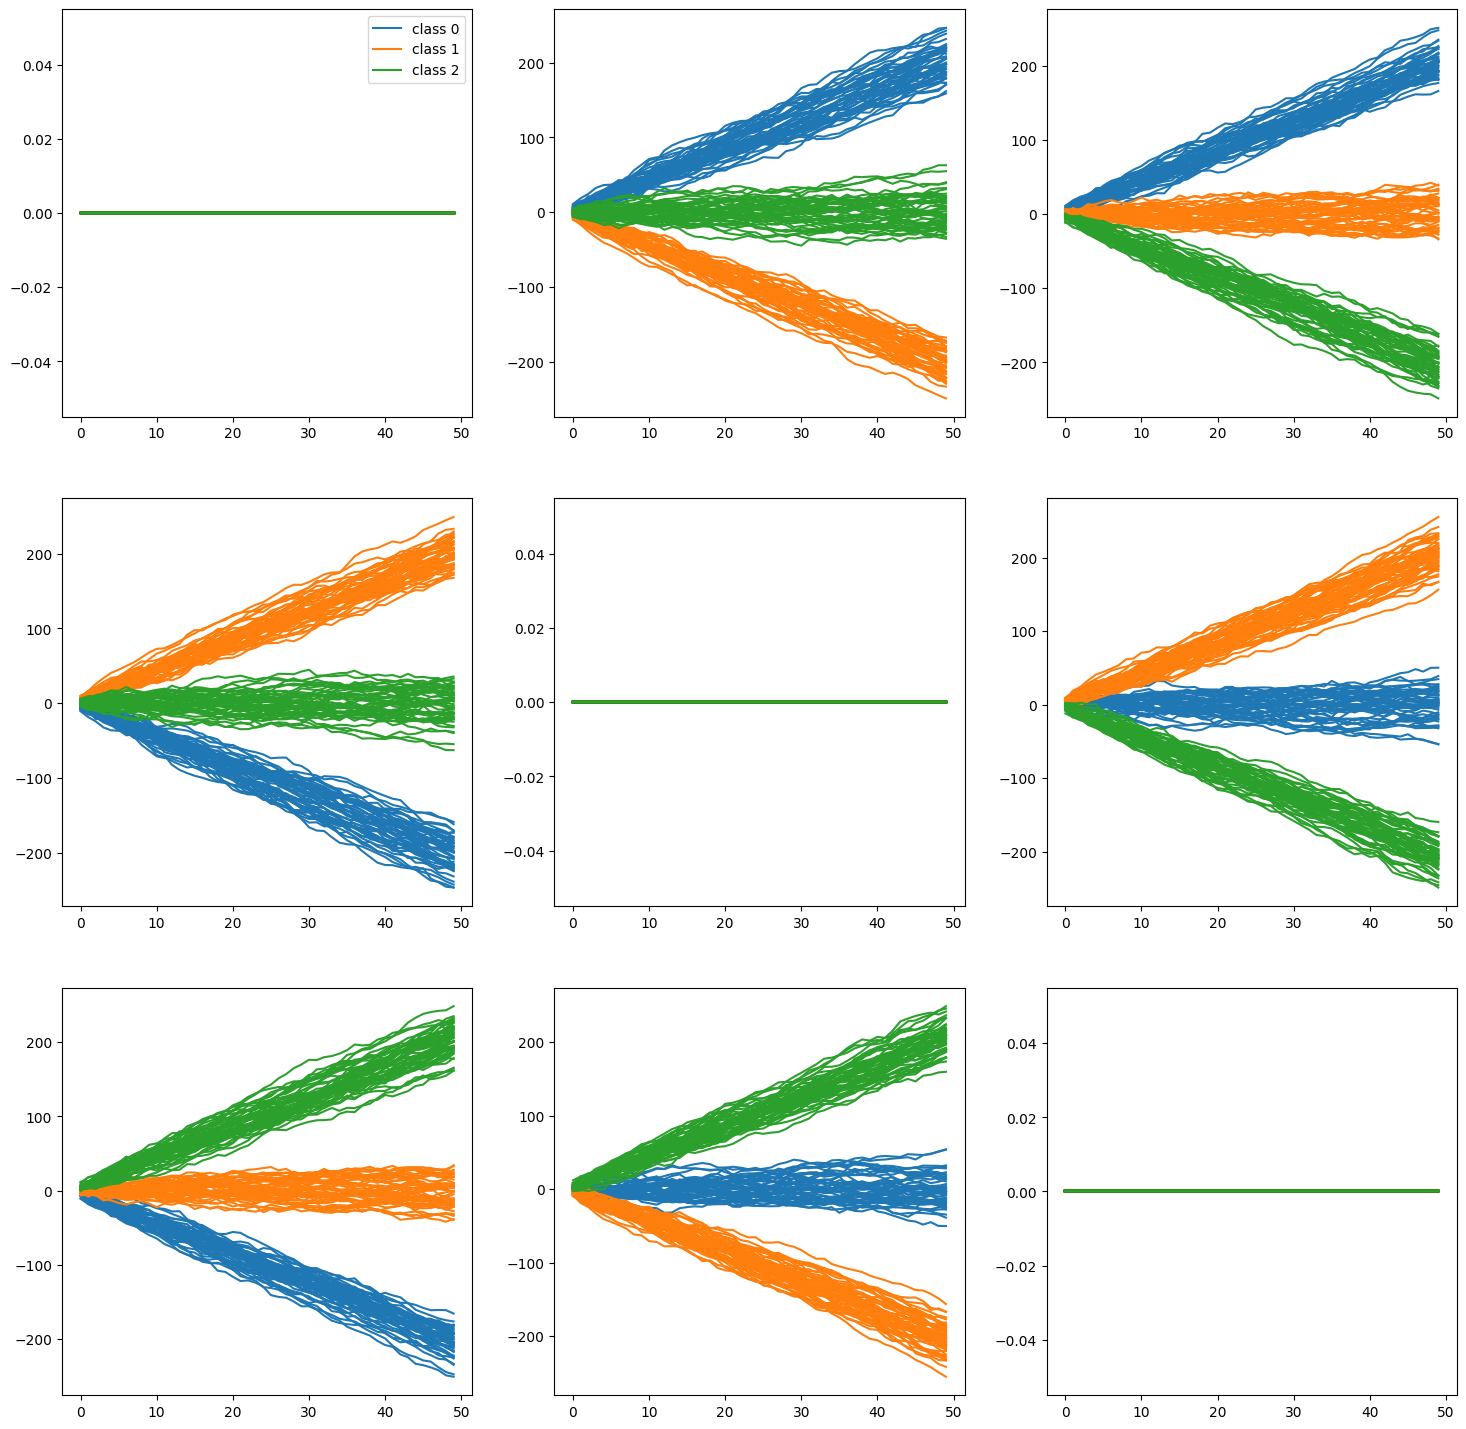

In [4]:
# Plot full log-likelihood ratio matrix

matplotlib.rcParams.update({'font.size': 22})

num_panels = conf.num_classes **2
num_trajectories = 100

jtplot.reset()

plt.figure(figsize=(18, 18))
plot_likelihood_ratio_matrix(llrm_iter_pool, y_iter_pool)
plt.show()

dice[1]=range(0, 3)


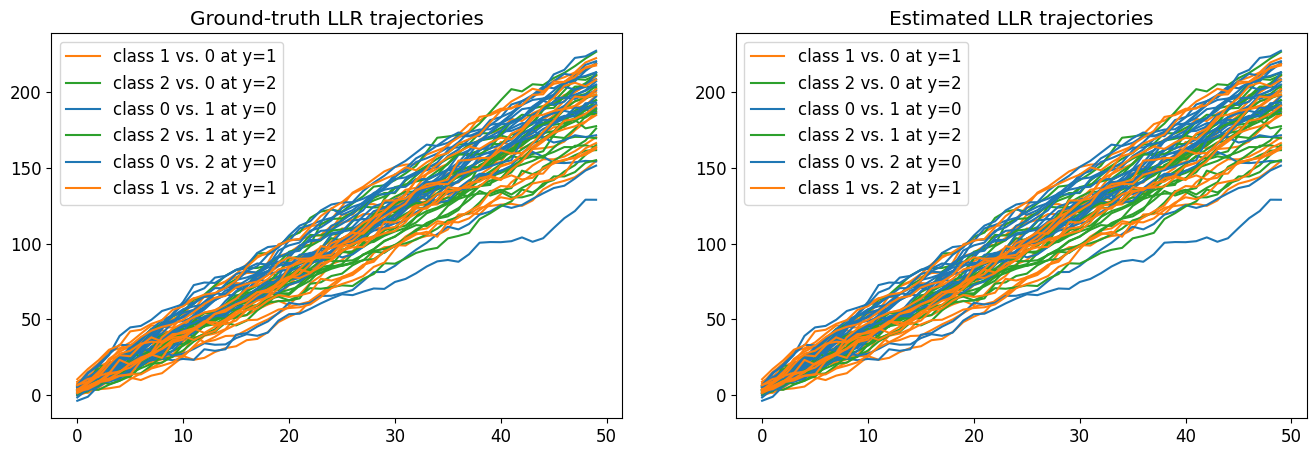

In [5]:
# plot a single, concise plot
matplotlib.rcParams.update({'font.size': 12})

plt.figure(figsize=(16.2, 5))
plt.title('Ground-truth LLR trajectories')
dice = plot_example_trajectories(llrm_iter_pool, y_iter_pool)